In [1]:
#fetch dataset
!pip install RegscorePy
!wget https://raw.githubusercontent.com/MSPawanRanjith/FileTransfer/master/kmean_dataset.csv

--2020-06-05 12:00:19--  https://raw.githubusercontent.com/MSPawanRanjith/FileTransfer/master/kmean_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1841 (1.8K) [text/plain]
Saving to: ‘kmean_dataset.csv’

kmean_dataset.csv   100%[===================>]   1.80K  --.-KB/s    in 0s      

2020-06-05 12:00:19 (31.6 MB/s) - ‘kmean_dataset.csv’ saved [1841/1841]



In [0]:
#import libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn import mixture
from sklearn.cluster import KMeans
from math import log

In [50]:
#read data, convert to dataframe,numpy array

data=pd.read_csv('kmean_dataset.csv')
X=data.to_numpy()

fig = px.scatter_3d(X, x=0, y=1, z=2)
fig.show()

In [54]:
#Not clear what the elbow point could be, rough plot for 2 clusters

kmeans = cluster.KMeans(n_clusters=2, n_jobs=-1)
kmeans.fit(X)
p_label = kmeans.labels_

data['p_label'] = p_label
XY = data.to_numpy()
fig = px.scatter_3d(XY, x=0, y=1, z=2, color=3)
fig.show()

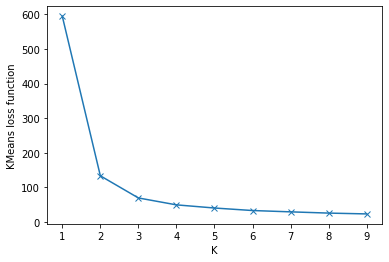

In [52]:
#plot loss function to find elbow point (rough estimation)

loss = []
ks = range(1, 10, 1)
for k in ks:
    kmeans = cluster.KMeans(n_clusters=k, n_jobs=1)
    kmeans.fit(X)
    loss.append(kmeans.inertia_)
    
plt.plot(ks, loss, 'x-')
plt.xlabel("K")
plt.ylabel("KMeans loss function")
plt.show()

In [65]:
def compute_bic(kmeans,X):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = X.shape

    # using euclidean distance
    cl_var = (1.0 / (N - m) / d) * sum([sum(scipy.spatial.distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')) for i in range(m)])

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) -  0.5 * m * np.log(N) * (d+1)

    return(BIC)



from sklearn import datasets,cluster
import scipy
data=pd.read_csv('kmean_dataset.csv')
X = data.to_numpy()
Y = p_label

ks = range(1,10)

KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in ks]
BIC = [compute_bic(kmeansi,X) for kmeansi in KMeans]

print(BIC)

[-535.5487012929482, -455.4907019073107, -469.9304373116162, -482.8251063154299, -497.63564599896995, -520.7892235354183, -529.7452685182758, -553.8450984025657, -568.9174452422545]


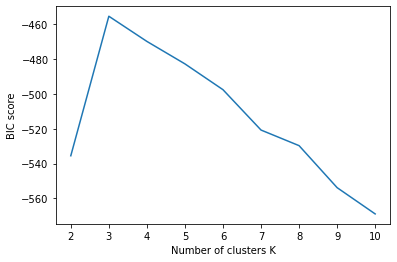

In [66]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),BIC)
plt.ylabel('BIC score')
plt.xlabel('Number of clusters K')
plt.show()

In [56]:
# As 3 was obtained as the best number for K, we split into 3 clusters
kmeans = cluster.KMeans(n_clusters=3, n_jobs=-1)
kmeans.fit(X)
p_label = kmeans.labels_

print("Predicted Labels")
print(p_label)
print("Cluster Centre Vectors")
print(kmeans.cluster_centers_)

Predicted Labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Cluster Centre Vectors
[[5.006      3.428      1.462     ]
 [5.84655172 2.73275862 4.3637931 ]
 [6.83571429 3.06428571 5.6547619 ]]


In [57]:
data['p_label'] = p_label
XY = data.to_numpy()
fig = px.scatter_3d(XY, x=0, y=1, z=2, color=3)
fig.show()

# Conclusion

The optimum number of clusters were found to be 3 using Bayesian Information Criterion. Other K values may also suffice needs depending on the Covariance Types.  